In [485]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

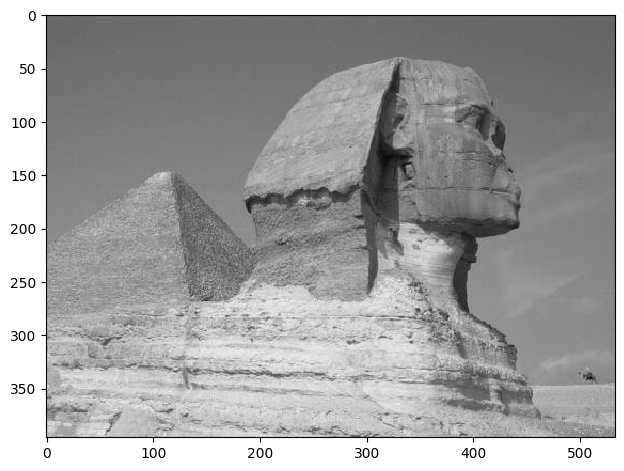

In [486]:
image = imread("test images/thesphinx.png",True)
imshow(image)

In [487]:
n_threshold = 2
image.shape

(396, 533)

In [488]:
image

array([[0.4066698 , 0.4066698 , 0.4066698 , ..., 0.39463725, 0.39463725,
        0.39463725],
       [0.40750314, 0.40750314, 0.40750314, ..., 0.39463725, 0.39463725,
        0.39463725],
       [0.41142471, 0.41142471, 0.41142471, ..., 0.39463725, 0.39463725,
        0.39463725],
       ...,
       [0.8057    , 0.74799255, 0.70457255, ..., 0.57688   , 0.55727216,
        0.58555647],
       [0.74826039, 0.71577176, 0.72753647, ..., 0.53429333, 0.50292078,
        0.51076392],
       [0.79028157, 0.73958392, 0.75498745, ..., 0.57743059, 0.54605804,
        0.53933098]])

In [489]:
threshold = [100,155]
np.sort(threshold)

array([100, 155])

(array([  305.,  2710.,  4418.,  7052., 64996., 52046., 33368., 21933.,
        21324.,  2916.]),
 array([0.02824667, 0.12153988, 0.2148331 , 0.30812631, 0.40141953,
        0.49471275, 0.58800596, 0.68129918, 0.77459239, 0.86788561,
        0.96117882]),
 <BarContainer object of 10 artists>)

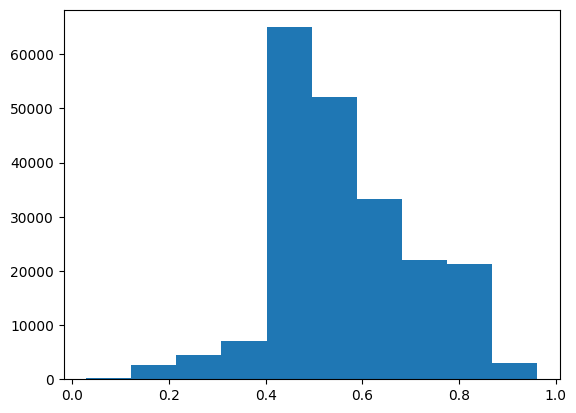

In [490]:
plt.hist(image.flatten())

In [491]:
# for i in np.arange(image.shape[0]):
#     for j in np.arange(image.shape[1]):
#         if (0 <image[i][j] <(threshold[0]/255)):
#             image[i][j] = 0
#         elif ((threshold[0]/255)<image[i][j]<(threshold[1]/255)):
#             image[i][j] = 0.5
#         else:
#             image[i][j] = 1


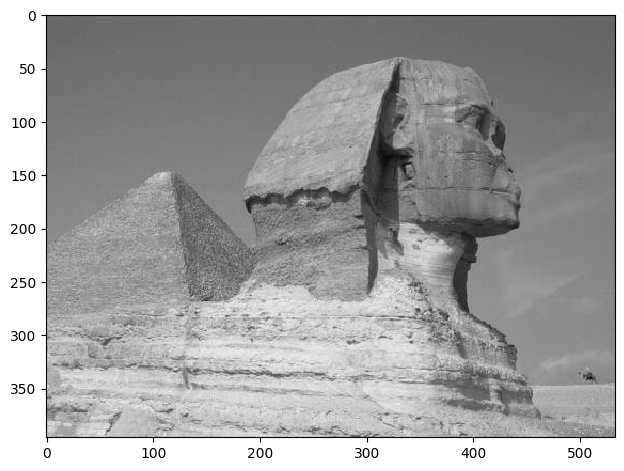

In [492]:
imshow(image)

In [493]:
mask = image < 100/255
np.count_nonzero(mask)

12561

In [494]:
image.shape

(396, 533)

In [495]:
new_image = np.zeros_like(image)
mask1 = np.where(((0 < image) & (image < 100/255)), 0, 0)
mask2 = np.where(((100/255) < image) & (image < (160/255)), (1/3), 0)
# mask3 = np.where(((160/255) < image) & (image < (200/255)), (2/3), 0)

mask4 = np.where(image > (160/255), 1, 0)
new_image = mask1 + mask2  + mask4


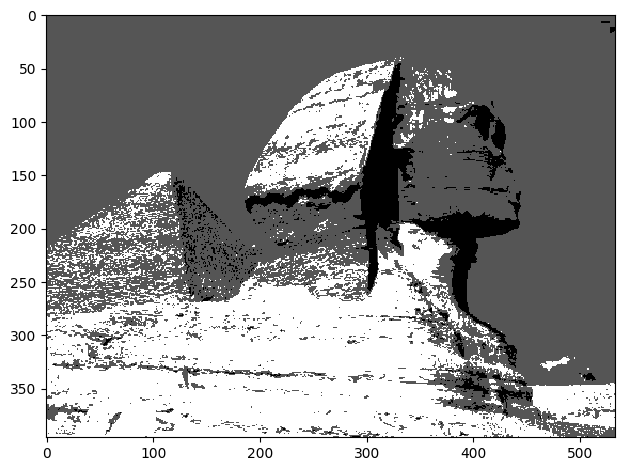

In [496]:
imshow(new_image)

In [497]:
np.arange(3)

array([0, 1, 2])

In [498]:
def spectral_threshold(image,threshold_num,thresholds):
    # sorting the threshold ascendingly to prevent any error in thresholding
    thresholds = np.sort(thresholds)
    # number of intervals between the thresholds
    intervals = threshold_num - 1
    # define the grayscale gradient corresponding to the number of thresholds
    step = float(1/threshold_num)
    grayscale_gradient = np.arange(0, (1+step), step)
    grayscale_gradient = grayscale_gradient[grayscale_gradient<=1]

    new_image = np.where( (image > 0 ) & (image < (thresholds[0]/255)), grayscale_gradient[0], 0)
    for i in np.arange(threshold_num-1):
        mask = np.where(((image > (thresholds[i]/255)) & (image < (thresholds[i+1]/255))), grayscale_gradient[i+1], 0)
        new_image += mask
    new_image += np.where((image > (thresholds[-1]/255)), grayscale_gradient[-1], 0)
    
    return new_image


# new_image = np.zeros_like(image)
# mask1 = np.where((0 < image) & (image < (threshold[0]/255)), 0, 0)
# mask2 = np.where(((threshold[0]/255) < image) & (image < (threshold[1]/255)), 0.5, 0)
# mask3 = np.where(image > (threshold[1]/255), 1, 0)
# new_image = mask1 + mask2 + mask3

In [503]:
np.arange(1)

array([0])

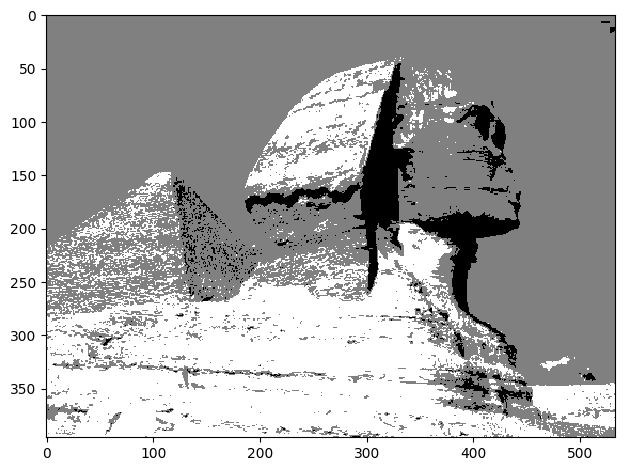

In [500]:
we = spectral_threshold(image,2,[100,160])
imshow(we)

In [501]:
image.size

211068

In [502]:
np.count_nonzero(new_image == we)

78063